### Importing the necessary libraries

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

### Data loading

In [5]:
df = pd.read_csv('market_train.csv')
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


### Data exploration

In [7]:
df.shape

(8523, 12)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [9]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [10]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [11]:
# handling outliers

In [12]:
df['Item_Weight']=df['Item_Weight'].fillna(df['Item_Weight'].mean())

In [13]:
mode_of_Outlet_size = df.pivot_table(values='Outlet_Size', columns='Outlet_Type', aggfunc=(lambda x: x.mode()[0]))
mode_of_Outlet_size

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


In [14]:
miss_values = df['Outlet_Size'].isnull()   

In [15]:
df.loc[miss_values, 'Outlet_Size'] = df.loc[miss_values,'Outlet_Type'].apply(lambda x: mode_of_Outlet_size[x])
df['Outlet_Size'].value_counts()

Outlet_Size
Small     4798
Medium    2793
High       932
Name: count, dtype: int64

### Data visualization

E:\programms\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Item_Weight', ylabel='Count'>

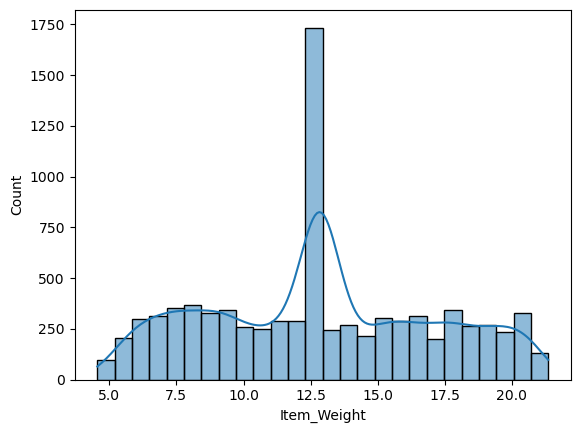

In [17]:
sns.histplot(df['Item_Weight'],kde=True)

E:\programms\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Item_Visibility', ylabel='Count'>

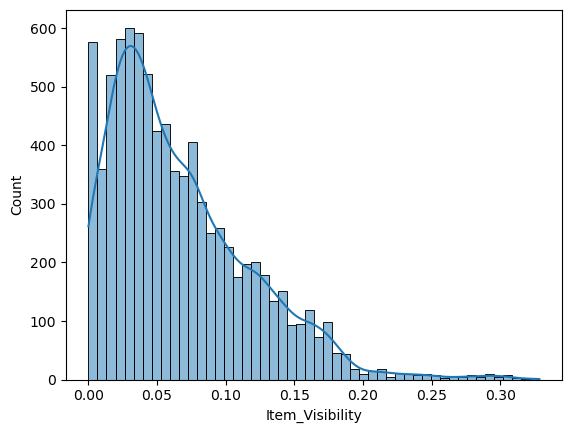

In [18]:
sns.histplot(df['Item_Visibility'],kde=True)

E:\programms\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Item_MRP', ylabel='Count'>

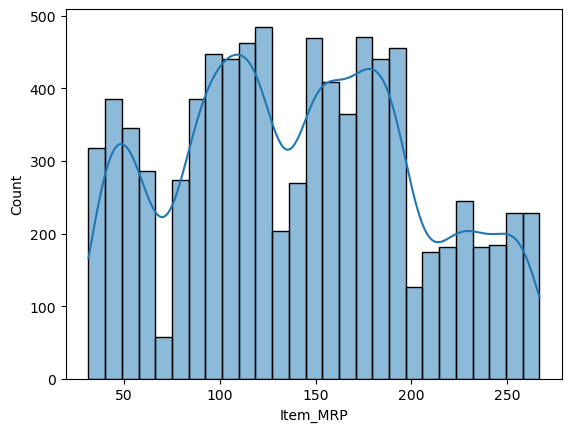

In [19]:
sns.histplot(df['Item_MRP'],kde=True)

E:\programms\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Item_Outlet_Sales', ylabel='Count'>

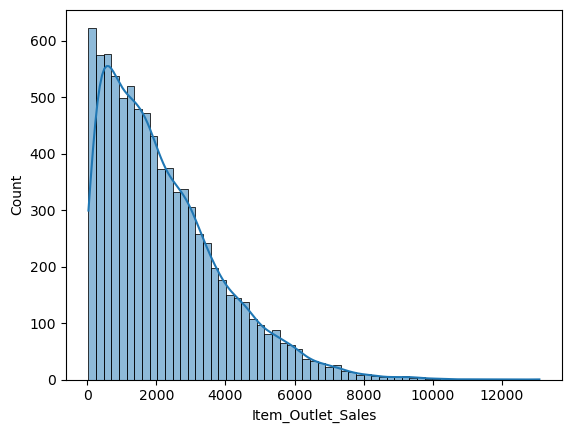

In [20]:
sns.histplot(df['Item_Outlet_Sales'],kde=True)

In [21]:
df['Item_Type'].value_counts(ascending=False)

Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: count, dtype: int64

In [22]:
df['Outlet_Size'].value_counts(ascending=False)

Outlet_Size
Small     4798
Medium    2793
High       932
Name: count, dtype: int64

In [23]:
df['Outlet_Type'].value_counts()

Outlet_Type
Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: count, dtype: int64

In [24]:
df['Outlet_Location_Type'].value_counts(ascending=False)

Outlet_Location_Type
Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: count, dtype: int64

In [25]:
df['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64

### Data preprocessing

In [27]:
df['Outlet_Size']=df['Outlet_Size'].replace({'Small':0,'Medium':1,'High':2})

In [28]:
df['Outlet_Location_Type']=df['Outlet_Location_Type'].replace({'Tier 1':1,'Tier 2':2,'Tier 3':3})

In [29]:
df['Item_Fat_Content']=df['Item_Fat_Content'].replace({'LF':'Low Fat','low fat':'Low Fat','reg':'Regular'})
df['Item_Fat_Content']=df['Item_Fat_Content'].replace({'Low Fat':1,'Regular':0})

In [30]:
df=pd.get_dummies(df,columns=['Item_Type','Outlet_Type'])

In [31]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Item_Outlet_Sales,...,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,FDA15,9.30,1,0.016047,249.8092,OUT049,1999,1,1,3735.1380,...,False,False,False,False,False,False,False,True,False,False
1,DRC01,5.92,0,0.019278,48.2692,OUT018,2009,1,3,443.4228,...,False,False,False,False,True,False,False,False,True,False
2,FDN15,17.50,1,0.016760,141.6180,OUT049,1999,1,1,2097.2700,...,True,False,False,False,False,False,False,True,False,False
3,FDX07,19.20,0,0.000000,182.0950,OUT010,1998,0,3,732.3800,...,False,False,False,False,False,False,True,False,False,False
4,NCD19,8.93,1,0.000000,53.8614,OUT013,1987,2,3,994.7052,...,False,False,False,False,False,False,False,True,False,False


### Splitting the data into train & test

In [33]:
X=df.drop(columns=['Item_Identifier','Item_Outlet_Sales','Outlet_Identifier'])
y=df['Item_Outlet_Sales']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

### Model training

In [35]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

### Model Evaluation

In [37]:
y_pred_train=model.predict(X_train)
y_pred=model.predict(X_test)
print('Train r2_score: ',r2_score(y_train,y_pred_train))
print('Test r2_score: ',r2_score(y_test,y_pred))

Train r2_score:  0.5587634073871326
Test r2_score:  0.5781667149951993
